
This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the Lab sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 

* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.

* Do the extra credit problems last. This can help you increase your scores

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [7]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn
import time

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold

In [2]:
boston = pd.read_csv("data.txt", sep = " ", header=None)
boston.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
target = pd.read_csv("target.txt", sep = " ", header=None)
boston["MEDV"] = target
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.218960,18.0,2.629288,0.0,0.869420,6.875396,65.2,4.347275,1.0,307.0,15.534711,397.462329,5.715647,24.0
1,0.141576,0.0,7.315612,0.0,0.549711,6.499894,78.9,5.315684,2.0,255.0,17.914131,397.012611,9.338417,21.6
2,0.380457,0.0,7.340354,0.0,0.697928,7.263489,61.1,5.356935,2.0,243.0,17.919989,396.628236,4.142473,34.7
3,0.313563,0.0,2.562407,0.0,0.599629,7.209732,45.8,6.103983,3.0,226.0,18.979527,398.564784,3.239272,33.4
4,0.330105,0.0,2.497337,0.0,0.476077,7.184111,54.2,6.264372,3.0,234.0,18.708888,399.487766,6.115159,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.205345,0.0,11.992590,0.0,0.686750,6.895386,69.1,2.805111,1.0,282.0,21.325449,395.822256,9.795056,22.4
502,0.120722,0.0,11.994115,0.0,0.583991,6.313574,76.7,2.652694,1.0,282.0,21.032632,398.559567,9.785685,20.6
503,0.226099,0.0,12.254201,0.0,0.689092,7.199346,91.0,2.348891,1.0,284.0,21.042043,398.026747,5.831161,23.9
504,0.139833,0.0,12.054379,0.0,0.650875,7.065029,89.3,2.783274,1.0,275.0,21.105130,395.290366,6.890841,22.0


---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between median housing price and number of rooms per house. Do the following:

(a) Regress the housing price on the number of rooms per house. Draw a scatter plot of housing price (y-axis) against rooms (x-axis), and draw the regression line in blue.  You might want to make the dots semi-transparent if it improves the presentation of the figure. 

(b) Regress the housing price on the number of rooms per house and the (number of rooms per house) squared.  Show the (curved) regression line in green. 

(c) Interpret your results.

In [34]:
X = boston.RM.values.reshape(-1,1)
y = boston.MEDV.values

lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
intercept, coef = lr.intercept_, lr.coef_[0]
print(intercept, coef)
# mean_squared_error(y, coef*X+intercept, squared=False)

-35.576206874519855 8.959927212241066


In [35]:
X2 = (boston.RM.values**2).reshape(-1,1)

lr2 = LinearRegression(fit_intercept=True)
lr2.fit(X2, y)
intercept2, coef2 = lr2.intercept_, lr2.coef_[0]
print(intercept2, coef2)
# mean_squared_error(y, coef2*X2+intercept2, squared=False)

-7.010080870675754 0.6941761002311669


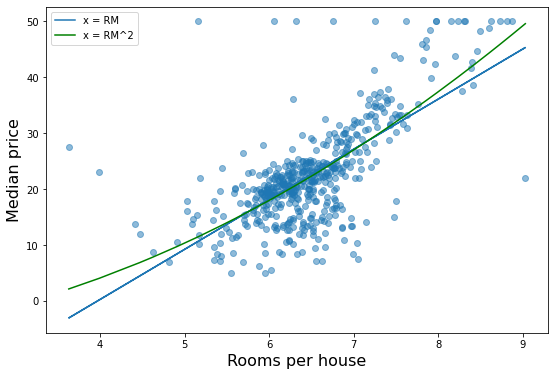

In [33]:
X = boston["RM"]
X_sorted = X.sort_values() # to keep curve from going back and forth
y = boston["MEDV"]
plt.figure(figsize=(9,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, coef*X+intercept, label="x = RM")
plt.plot(X_sorted, coef2*X_sorted**2+intercept2, color="green", label="x = RM^2")
plt.xlabel('Rooms per house', fontsize=16)
plt.ylabel('Median price', fontsize=16)
plt.legend()


*Observations*

In the chart, we can see some datapoints lie on the upper part. The regression curve of RM^2 fits better to the dataset because it's closer to these outliers when x is relative small (<5) or large (>8). In short, the RMSE of RM^2 model is smaller than RM model.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 5-fold cross-validation to fit the regression model (a) from 1.1, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Create a new scatterplot of housing price against rooms, and draw the five different regression lines in light blue, and the oroginal regression line from 1.1 in red (which was estimated using the full dataset). What do you notice?

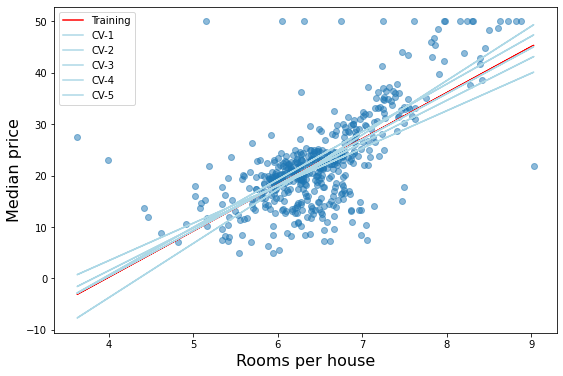

In [6]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)
params = []

for train_idx, test_idx in cv.split(X, y):
    # get split dataset
    cv_train_X, cv_test_X = X.iloc[train_idx].values.reshape(-1,1), X.iloc[test_idx].values.reshape(-1,1)
    cv_train_y, cv_test_y = y.iloc[train_idx].values, y.iloc[test_idx].values
    
    # fit model
    lr = LinearRegression(fit_intercept=True)
    lr.fit(cv_train_X, cv_train_y)
    
    # record
    params.append([lr.intercept_, lr.coef_[0]])    


# plot 
plt.figure(figsize=(9,6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, coef*X+intercept, color="red", label="Training")
for i in range(len(params)):
    intercept = params[i][0]
    slope = params[i][1]
    plt.plot(X, slope*X+intercept, color="lightblue", label=f"CV-{i+1}")
plt.xlabel('Rooms per house', fontsize=16)
plt.ylabel('Median price', fontsize=16)
plt.legend()

*Observations*

The regression line of each fold are colse to the red line (the original regression line).

## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds
* How do your coefficients compare to the ones estimated through standard libraries? Does this depend on *R*?

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence.*

In [19]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=1000, stopping_tolerance=0.0000000001):
    # initialize the parameters
    start_time = time.time()
    N = len(xvalues)
    alpha = 10 #-35.5762
    beta = 10 #8.9599
    loss = ((alpha + beta*xvalues - yvalues)**2).sum()/(2*N)
    
    # gradient descent
    alpha_visited, beta_visited, loss_visited = [alpha], [beta], [loss]
    iterations = 0
    while iterations < MaxIterations:
        
        # calculate first derivative
        error = alpha + beta*xvalues - yvalues
        deriv_alpha = error.sum()/N
#         deriv_beta = (error*xvalues).sum()/N
        deriv_beta = error.dot(xvalues)/N  # arrayA.dot(arrayB) == (arrayA*arrayB).sum()
        
        # update the parameters
        alpha = alpha - R * deriv_alpha
        beta = beta - R * deriv_beta
        loss = ((alpha + beta*xvalues - yvalues)**2).sum()/(2*N) # not parameters
        
        # record the process
        alpha_visited.append(alpha)
        beta_visited.append(beta)
        loss_visited.append(loss)
        iterations += 1
        
        # stopping condition
        if iterations > 1 and (abs(loss_visited[-1] - loss_visited[-2]) < stopping_tolerance):
            break
        
    best_alpha = alpha_visited[-1]
    best_beta = beta_visited[-1]
    
    print("Time taken: {:.2f} seconds".format(time.time() - start_time))
    print(f"starting_loss: {loss_visited[0]}\nending_loss: {loss_visited[-1]}\nalpha: {best_alpha}\nbeta: {best_beta}\niteration: {iterations}")
    return best_alpha, best_beta, loss_visited[-1]

# driver
X = boston["RM"].values
y = boston["MEDV"].values
learning_rate = [0.01, 0.005, 0.001]
for R in learning_rate:
    print(f"===== learning rate: {R} =====")
    _, _, _ = bivariate_ols(X, y, R, 1000000)
    print("\n")


===== learning rate: 0.01 =====
Time taken: 1.79 seconds
starting_loss: 1391.2861893959614
ending_loss: 22.24593778550142
alpha: -35.567552127305916
beta: 8.958607963487506
iteration: 74792


===== learning rate: 0.005 =====
Time taken: 3.23 seconds
starting_loss: 1391.2861893959614
ending_loss: 22.245938223233544
alpha: -35.563966895543025
beta: 8.958061464275282
iteration: 143519


===== learning rate: 0.001 =====
Time taken: 14.44 seconds
starting_loss: 1391.2861893959614
ending_loss: 22.245941725609182
alpha: -35.54883525910374
beta: 8.955754939079526
iteration: 647146




*Observations*

- In general, the 3 different learning rate all converged to the same minimum. The coefficients are pretty close, and they are also close to the parameters emtimated by `sklearn.LinearRegression`.
- Smaller learning rate took more time to converge.
- Different R brings changes in the result (coeffients and final loss). Using a constant R in this exercise, we can't assume that smaller R always converge to a better minimum (with smaller loss).

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [3]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using TAX and RM as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [9]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xmatrix, yvalues, R=0.01, MaxIterations=1000, stopping_tolerance=0.0000000001, printing=True):
    # initialize the parameters
    start_time = time.time()
    N = len(xmatrix)
    var_N = len(xmatrix[0])
    alpha = 10
    beta_arr = 10 * np.ones(var_N)
    loss = ((alpha + xmatrix.dot(beta_arr) - yvalues)**2).sum()/(2*N)
    
    # initiate gradient descent
    alpha_visited, beta_arr_visited, loss_visited = [alpha], [beta_arr], [loss]
    iterations = 0
    while iterations < MaxIterations:
        
        # calculate first derivative
        error = alpha + xmatrix.dot(beta_arr) - yvalues
        deriv_alpha = error.sum()/N
        deriv_beta_arr = np.zeros(var_N)
        for b in range(var_N):
            beta = beta_arr[b]
            loc_arr = np.zeros(var_N)
            loc_arr[b] = 1
#             deriv_beta = (error*(xmatrix.dot(loc_arr))).sum()/N
            deriv_beta = error.dot(xmatrix.dot(loc_arr))/N
            deriv_beta_arr[b] = deriv_beta
        
        # update the parameters
        alpha = alpha - R * deriv_alpha
        beta_arr = beta_arr - R * deriv_beta_arr
        loss = ((alpha + xmatrix.dot(beta_arr) - yvalues)**2).sum()/(2*N)
        
        # record the process
        alpha_visited.append(alpha)
        beta_arr_visited.append(beta_arr)
        loss_visited.append(loss)
        iterations += 1
        
        # stopping condition
        if iterations > 1 and (abs(loss_visited[-1] - loss_visited[-2]) < stopping_tolerance):
            break
        
    best_alpha = alpha_visited[-1]
    best_beta_arr = beta_arr_visited[-1]
    
    if printing:
        print("Time taken: {:.2f} seconds".format(time.time() - start_time))
        print(f"starting_loss: {loss_visited[0]}\nending_loss: {loss_visited[-1]}\nalpha: {best_alpha}\nbeta: {best_beta_arr}\niteration: {iterations}")
    return best_alpha, best_beta_arr, loss_visited[-1]

# driver
X = standardize(boston[["TAX", "RM"]].values) # standardized input variables
y = boston["MEDV"].values

learning_rate = [0.1, 0.01, 0.001]
for R in learning_rate:
    print(f"===== learning rate: {R} =====")
    _, _, _ = multivariate_ols(X, y, R, 1000000)
    print("\n")

   
    

===== learning rate: 0.1 =====
Time taken: 0.01 seconds
starting_loss: 171.9821423587905
ending_loss: 18.847316062695704
alpha: 22.532806115529578
beta: [-2.72132857  5.53877057]
iteration: 170


===== learning rate: 0.01 =====
Time taken: 0.08 seconds
starting_loss: 171.9821423587905
ending_loss: 18.847316069003675
alpha: 22.53280487075287
beta: [-2.72125953  5.53883959]
iteration: 1589


===== learning rate: 0.001 =====
Time taken: 0.45 seconds
starting_loss: 171.9821423587905
ending_loss: 18.847316132074077
alpha: 22.532798818168533
beta: [-2.72104486  5.5390542 ]
iteration: 14321




*Observations*

Compared to using only one feature (in 2.1), using multiple features:
- Converged at a smaller loss
- Took less time and iteration to converge


In [10]:
# test codes
x = np.array(boston[["CRIM", "ZN"]].head())
x

array([[ 0.21896028, 18.        ],
       [ 0.14157586,  0.        ],
       [ 0.38045747,  0.        ],
       [ 0.31356268,  0.        ],
       [ 0.3301047 ,  0.        ]])

In [11]:
b = np.array([1, 2])
(x.dot(b)).dot(x.dot(b))

1312.1851657678017

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [12]:
# driver
X = boston[["TAX", "RM"]].values
y = boston["MEDV"].values

learning_rate = [0.1, 0.01, 0.001]
for R in learning_rate:
    print(f"===== learning rate: {R} =====")
    _, _, _ = multivariate_ols(X, y, R, 1000000)
    print("\n")


===== learning rate: 0.1 =====


<ipython-input-9-9df4f69fec08>:58: RuntimeWarning: overflow encountered in square
  loss = ((alpha + xmatrix.dot(beta_arr) - yvalues)**2).sum()/(2*N)
/Users/heidi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-9-9df4f69fec08>:67: RuntimeWarning: invalid value encountered in double_scalars
  if iterations > 1 and (abs(loss_visited[-1] - loss_visited[-2]) < stopping_tolerance):
<ipython-input-9-9df4f69fec08>:57: RuntimeWarning: invalid value encountered in subtract
  beta_arr = beta_arr - R * deriv_beta_arr


Time taken: 30.50 seconds
starting_loss: 10260042.863935156
ending_loss: nan
alpha: nan
beta: [nan nan]
iteration: 1000000


===== learning rate: 0.01 =====
Time taken: 33.21 seconds
starting_loss: 10260042.863935156
ending_loss: nan
alpha: nan
beta: [nan nan]
iteration: 1000000


===== learning rate: 0.001 =====
Time taken: 35.00 seconds
starting_loss: 10260042.863935156
ending_loss: nan
alpha: nan
beta: [nan nan]
iteration: 1000000




*Observations*

Without standardizing the input X, the model could not converge, and the estimated loss will increase instead of minimizing.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that. Use 5-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for TAX and RM). Since there are 5 folds, there will be 5 sets of three coefficients -- report them all in a 5x3 table.

In [13]:
X = standardize(boston[["TAX", "RM"]].values)
y = boston["MEDV"].values

cv = KFold(n_splits=5)
coef_table = []

for train_idx, test_idx in cv.split(X, y):
    # get split dataset
    cv_train_X, cv_test_X = X[train_idx], X[test_idx]
    cv_train_y, cv_test_y = y[train_idx], y[test_idx]
    
    # fit model
    alpha, beta, _ = multivariate_ols(cv_train_X, cv_train_y, 0.01, 1000000, printing=False)
    
    # record
    coef_table.append([alpha, beta[0], beta[1]])

coef_table = pd.DataFrame(coef_table)
coef_table.columns=["intercept", "coef_TAX", "coef_RM"]
display(coef_table)

,intercept,coef_TAX,coef_RM
0,23.043964,-3.146726,5.258522
1,22.268044,-2.733818,4.903569
2,21.937024,-2.492420,4.542431
3,22.220313,-3.264265,6.656393
4,23.259085,-1.527905,6.200851


*Observations*

The coefficeints in different folds should be close to each other if sampling is fully randomized and stratified, just like the plot in 1.2. 

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the cross-validated RMSE for each of the 5 folds above. In other words, in fold 1, use the parameters estimated on the 80% of the data to make predictions for the 20%, and calculate the RMSE for those 20%. Repeate this for the remaining folds. Report the RMSE for each of the 5-folds, and the average (mean) RMSE across the five folds. How does this average RMSE compare to the performance of your nearest neighbor algorithm from the last problem set?

In [11]:
import time 

def distance(x1, x2, L):
    x1, x2 = np.array(x1), np.array(x2)
    if len(x1) == len(x2):
        dist = np.power(np.power(abs(x1 - x2), L).sum(), 1/L)
        return dist

def knn(x_train, y_train, x_test, y_test, L, K, output_runtime=True):
    start_time = time.time()
    n_train = len(x_train)
    n_test = len(x_test)
    
    # predict on testing data
    y_pred_test = []
    for i in range(n_test):
        dist = []
        for j in range(n_train):
            dist.append(distance(x_test[i], x_train[j], L))
        nearest_idx = pd.Series(dist).sort_values().index[:K]
        prediction = y_train[nearest_idx].mean()
        y_pred_test.append(prediction)
        
    rmse = mean_squared_error(y_test, y_pred_test, squared=False)
    runtime = time.time() - start_time
    if output_runtime:
        print("Time taken: %.2f seconds" % runtime)

    return rmse, y_pred_test, runtime

In [12]:
X = standardize(boston[["TAX", "RM"]].values)
y = boston["MEDV"].values

cv = KFold(n_splits=5)
ols_rmse = []
knn_rmse = []

for train_idx, test_idx in cv.split(X, y):
    # get split dataset
    cv_train_X, cv_test_X = X[train_idx], X[test_idx]
    cv_train_y, cv_test_y = y[train_idx], y[test_idx]
    
    ### OLS ###
    alpha, beta_arr, _ = multivariate_ols(cv_train_X, cv_train_y, 0.01, 1000000, printing=False)
    cv_test_y_pred = alpha + cv_test_X.dot(beta_arr)
    ols_rmse.append(mean_squared_error(cv_test_y, cv_test_y_pred, squared=False))
    
    ### KNN ###
    cv_knn_rmse, _, _ = knn(cv_train_X, cv_train_y, cv_test_X, cv_test_y, L=2, K=5, output_runtime=False)
    knn_rmse.append(cv_knn_rmse)
    
print("===== OLS =====")
print("RMSE in 5 CV:\n", pd.DataFrame(ols_rmse))
print("avg RMSE: ", np.mean(ols_rmse))

print("===== KNN =====")
print("RMSE in 5 CV:\n", pd.DataFrame(knn_rmse))
print("avg RMSE: ", np.mean(knn_rmse))


===== OLS =====
RMSE in 5 CV:
            0
0   4.253769
1   5.567072
2   5.536903
3  10.587122
4   6.924939
avg RMSE:  6.573960970694429
===== KNN =====
RMSE in 5 CV:
           0
0  3.481584
1  4.680790
2  3.719116
3  8.910964
4  6.377141
avg RMSE:  5.433919081588295


*Observations*

Using the same feature set: ["TAX", "RM"], 
- The average cross-validated RMSE of multivariate OLS is 6.57 
- The average cross-validated RMSE of KNN (K=5, from PS3) is 5.43
- KNN performs better in every fold.


### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [20]:
def predict(X, alpha, beta_arr):
    log_odds = alpha + X.dot(beta_arr)
    y_prob = 1.0/(1 + np.exp(-log_odds))
    return y_prob
    
def logsitic_regression(xmatrix, yvalues, R=0.01, MaxIterations=1000, stopping_tolerance=0.0000000001, printing=True):
    start_time = time.time()
    N = len(xmatrix)
    var_N = len(xmatrix[0])
    alpha = 10
    beta_arr = 10 * np.ones(var_N)
    y_prob = predict(xmatrix, alpha, beta_arr)
    loss = -np.mean(yvalues*(np.log(y_prob)) - (1-yvalues)*np.log(1-y_prob))
    
    # initiate gradient descent
    alpha_visited, beta_arr_visited, loss_visited = [alpha], [beta_arr], [loss]
    iterations = 0
    while iterations < MaxIterations:
        
        # calculate first derivative
        error = y_prob - yvalues
        deriv_alpha = error.sum()/N
        deriv_beta_arr = np.zeros(var_N)
        for b in range(var_N):
            beta = beta_arr[b]
            loc_arr = np.zeros(var_N)
            loc_arr[b] = 1
            deriv_beta = (error*(xmatrix.dot(loc_arr))).sum()/N
            deriv_beta_arr[b] = deriv_beta
        
        # update the parameters
        alpha = alpha - R * deriv_alpha
        beta_arr = beta_arr - R * deriv_beta_arr
        y_prob = predict(xmatrix, alpha, beta_arr)
        loss = -np.mean(yvalues*(np.log(y_prob)) - (1-yvalues)*np.log(1-y_prob))
        
        # record the process
        alpha_visited.append(alpha)
        beta_arr_visited.append(beta_arr)
        loss_visited.append(loss)
        iterations += 1
        
        # stopping condition
        if iterations > 1 and (abs(loss_visited[-1] - loss_visited[-2]) < stopping_tolerance):
            break
        
    best_alpha = alpha_visited[-1]
    best_beta_arr = beta_arr_visited[-1]
    
    if printing:
        print("Time taken: {:.2f} seconds".format(time.time() - start_time))
        print(f"starting_loss: {loss_visited[0]}\nending_loss: {loss_visited[-1]}\nalpha: {best_alpha}\nbeta: {best_beta_arr}\niteration: {iterations}")
    return best_alpha, best_beta_arr, loss_visited[-1]

# driver
boston["EXPENSIVE"] = (boston["MEDV"] > 40)*1
X = standardize(boston[["CHAS", "RM"]].values)
y = boston["EXPENSIVE"].values

# train model
with np.errstate(divide='ignore', invalid='ignore'): # mute NaN warnings occured during loss calculation
    alpha, beta_arr, _ = logsitic_regression(X, y, 0.01, 100000)

# predict
y_prob = predict(X, alpha, beta_arr)
y_pred = (y_prob > 0.5)

# performance
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
print("\n")
print("====== Metrics ======")
print("accuracy: %5.3f " % accuracy, 
     "precision: %5.3f " % precision,
     "recall: %5.3f " % recall)
print("baseline performance: 1 - (proportion of EXPENSIVE=1) = %5.3f" % (1-boston["EXPENSIVE"].sum()/boston.shape[0]))

Time taken: 0.83 seconds
starting_loss: nan
ending_loss: 0.042264132280572436
alpha: -5.003459463216685
beta: [0.38265341 2.38184967]
iteration: 11513


====== Metrics ======
accuracy: 0.960  precision: 0.762  recall: 0.516 
baseline performance: 1 - (proportion of EXPENSIVE=1) = 0.939


*Observations*

- Since this is a highly imbalanced dataset, the baseline performance ~= predicting the majority calss for all datapoints. That's accuracy=0.939, recall=0.00 in this case.
- The LogisticRegression model provides accuracy=0.960, recall=0.516, which is better than baseline.

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

Step 2: Randomly sample 80% of your data and call this the training set, and set aside the remaining 20% as your test set.

In [22]:
# create interaction feature list
feature_list = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
feature_pairs = []
for f1 in range(len(feature_list)):
#     feature_pairs.append([feature_list[f1]])
#     feature_pairs.append([feature_list[f1], feature_list[f1]])
    for f2 in range(f1+1, len(feature_list)):
        pair = [feature_list[f1], feature_list[f2]]
        feature_pairs.append(pair)
feature_pairs

[['CRIM', 'ZN'],
 ['CRIM', 'INDUS'],
 ['CRIM', 'CHAS'],
 ['CRIM', 'NOX'],
 ['CRIM', 'RM'],
 ['CRIM', 'AGE'],
 ['CRIM', 'DIS'],
 ['CRIM', 'RAD'],
 ['CRIM', 'TAX'],
 ['CRIM', 'PTRATIO'],
 ['CRIM', 'B'],
 ['CRIM', 'LSTAT'],
 ['ZN', 'INDUS'],
 ['ZN', 'CHAS'],
 ['ZN', 'NOX'],
 ['ZN', 'RM'],
 ['ZN', 'AGE'],
 ['ZN', 'DIS'],
 ['ZN', 'RAD'],
 ['ZN', 'TAX'],
 ['ZN', 'PTRATIO'],
 ['ZN', 'B'],
 ['ZN', 'LSTAT'],
 ['INDUS', 'CHAS'],
 ['INDUS', 'NOX'],
 ['INDUS', 'RM'],
 ['INDUS', 'AGE'],
 ['INDUS', 'DIS'],
 ['INDUS', 'RAD'],
 ['INDUS', 'TAX'],
 ['INDUS', 'PTRATIO'],
 ['INDUS', 'B'],
 ['INDUS', 'LSTAT'],
 ['CHAS', 'NOX'],
 ['CHAS', 'RM'],
 ['CHAS', 'AGE'],
 ['CHAS', 'DIS'],
 ['CHAS', 'RAD'],
 ['CHAS', 'TAX'],
 ['CHAS', 'PTRATIO'],
 ['CHAS', 'B'],
 ['CHAS', 'LSTAT'],
 ['NOX', 'RM'],
 ['NOX', 'AGE'],
 ['NOX', 'DIS'],
 ['NOX', 'RAD'],
 ['NOX', 'TAX'],
 ['NOX', 'PTRATIO'],
 ['NOX', 'B'],
 ['NOX', 'LSTAT'],
 ['RM', 'AGE'],
 ['RM', 'DIS'],
 ['RM', 'RAD'],
 ['RM', 'TAX'],
 ['RM', 'PTRATIO'],
 ['RM', 'B'],
 

In [23]:
# create squard features
for f in feature_list:
    boston[f"{f}^2"] = boston[f]**2

# create paired features 
for p in feature_pairs:
    f1, f2 = p[0], p[1] 
    boston[f"{f1}x{f2}"] = boston[f1] * boston[f2]
    
# standardizing input variables
X = standardize(boston)
X.drop(columns=["MEDV", "EXPENSIVE"], inplace=True)
# X.drop(columns=["MEDV"], inplace=True)
display(X.describe())
y = boston["MEDV"]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RADxTAX,RADxPTRATIO,RADxB,RADxLSTAT,TAXxPTRATIO,TAXxB,TAXxLSTAT,PTRATIOxB,PTRATIOxLSTAT,BxLSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,...,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,3.230837e-16,-6.343191e-16,-3.407463e-16,4.701992e-16,-1.400998e-15,-2.825254e-15,-1.423762e-15,-1.876409e-15,5.441409e-16,1.753099e-16,...,-2.310405e-16,4.783174e-16,-3.708057e-17,-2.962057e-17,1.295626e-16,1.018399e-15,1.614870e-16,2.808469e-15,2.049305e-16,1.520962e-15
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,...,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.361564e-01,-4.877224e-01,-1.538226e+00,-2.725986e-01,-2.015477e+00,-4.050681e+00,-2.335437e+00,-1.356452e+00,-9.828429e-01,-1.330951e+00,...,-7.859111e-01,-9.530100e-01,-1.003561e+00,-7.579511e-01,-1.334296e+00,-2.145452e+00,-1.046549e+00,-3.550789e+00,-1.450656e+00,-1.671223e+00
25%,-4.073236e-01,-4.877224e-01,-8.728710e-01,-2.725986e-01,-7.527715e-01,-5.853111e-01,-8.374480e-01,-7.969357e-01,-6.379618e-01,-7.610163e-01,...,-6.372634e-01,-6.226994e-01,-5.285371e-01,-6.199807e-01,-7.645161e-01,-5.729753e-01,-7.417752e-01,-2.324111e-01,-7.955287e-01,-7.401321e-01
50%,-3.818725e-01,-4.877224e-01,-2.251620e-01,-2.725986e-01,-3.151203e-02,-1.013785e-01,3.173816e-01,-2.838178e-01,-5.230014e-01,-4.433962e-01,...,-5.380618e-01,-5.585222e-01,-3.791751e-01,-4.763288e-01,-4.593501e-01,-2.926274e-01,-4.061227e-01,3.025343e-01,-2.222831e-01,-1.689888e-01
75%,5.657007e-03,4.877224e-02,1.012410e+00,-2.725986e-01,6.302320e-01,4.896922e-01,9.067981e-01,6.613002e-01,1.661245e+00,1.494977e+00,...,1.651325e+00,1.639488e+00,-9.403750e-02,1.364565e-01,1.495848e+00,3.617118e-01,5.323260e-01,6.356537e-01,6.548578e-01,5.201456e-01
max,9.936231e+00,3.804234e+00,2.439882e+00,3.668398e+00,2.492551e+00,3.609165e+00,1.117494e+00,3.881584e+00,1.661245e+00,1.833376e+00,...,1.703243e+00,1.689182e+00,2.203021e+00,3.835083e+00,1.804739e+00,2.264795e+00,3.794034e+00,1.072959e+00,3.571392e+00,4.109090e+00


In [24]:
# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape)
print(r"mean: %5.3f" % y_train.mean(),", %5.3f" % y_test.mean())

(404, 104) (102, 104)
mean: 22.522 , 22.575


### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can (Don't forget to add quadratic terms. Form instance, RM^2.).  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [30]:
testing_condition = ["13 features", "26 features(+ squared)", "39 features"] # "104 features (all pairs)"
testing_feature = [13, 26, 39]
    
for i in range(3):
    print("Testing Condition: ", testing_condition[i])
    n = testing_feature[i]
    partial_X_train = X_train.iloc[:,0:n].values
    partial_X_test = X_test.iloc[:,0:n].values
    
    # train
    alpha, beta_arr, _ = multivariate_ols(partial_X_train, y_train, R=0.01, MaxIterations=1000000, printing=False)

    # prediction
    y_train_pred = alpha + partial_X_train.dot(beta_arr)
    y_test_pred = alpha + partial_X_test.dot(beta_arr)

    # performance
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    print("****** train RMSE: %5.3f *****" % train_rmse)
    print("****** test RMSE: %5.3f *****" % test_rmse, "\n")

Testing Condition:  13 features
****** train RMSE: 4.751 *****
****** test RMSE: 4.891 ***** 

Testing Condition:  26 features(+ squared)
****** train RMSE: 4.022 *****
****** test RMSE: 3.733 ***** 

Testing Condition:  39 features
****** train RMSE: 3.859 *****
****** test RMSE: 3.553 ***** 



*Observations*

| Algorithm      | Feature count | RSME |
| :---           |    :----:     | ---: |
| KNN            | 2             | 5.43 (CV)   |
| OLS (in 3.2)   | 2             | 6.57 (CV)   |
| OLS (in 4.2)   | 13            | 4.75 (Train) / 4.89 (Test)|
| OLS (in 4.2)   | 26            | 4.02 (Train) / 3.73 (Test)|
| OLS (in 4.2)   | 39            | 3.86 (Train) / 3.55 (Test)|

1. Overall, using mode features in OLS regression results in smaller RSME.
2. In 4.2 OLS, the gap between train RSME and test RMSE gets larger when more features are added to the model.

### 4.3 Ridge regularization (basic)
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data, using the value lambda = 0.5.  Report the RMSE obtained for your training data, and the RMSE obtained for your testing data.

In [31]:
def multivariate_ols(xmatrix, yvalues, lam=0.5, R=0.01, MaxIterations=1000, stopping_tolerance=0.0000000001, printing=True):
    # initialize the parameters
    start_time = time.time()
    N = len(xmatrix)
    var_N = len(xmatrix[0])
    alpha = 10
    beta_arr = 10 * np.ones(var_N)
    loss = ((alpha + xmatrix.dot(beta_arr) - yvalues)**2).sum()/(2*N) + lam*(np.append(alpha, beta_arr)**2).sum()
    
    # initiate gradient descent
    alpha_visited, beta_arr_visited, loss_visited = [alpha], [beta_arr], [loss]
    iterations = 0
    while iterations < MaxIterations:
        
        # calculate first derivative
        error = alpha + xmatrix.dot(beta_arr) - yvalues
        deriv_alpha = error.sum()/N
        deriv_beta_arr = np.zeros(var_N)
        for b in range(var_N):
            beta = beta_arr[b]
            loc_arr = np.zeros(var_N)
            loc_arr[b] = 1
            deriv_beta = error.dot(xmatrix.dot(loc_arr))/N
            deriv_beta_arr[b] = deriv_beta
        
        # update the parameters
        alpha = alpha - R * deriv_alpha
        beta_arr = beta_arr * (1-R*lam/N) - R * deriv_beta_arr
        loss = ((alpha + xmatrix.dot(beta_arr) - yvalues)**2).sum()/(2*N) + lam*(np.append(alpha, beta_arr)**2).sum()

        # record the process
        alpha_visited.append(alpha)
        beta_arr_visited.append(beta_arr)
        loss_visited.append(loss)
        iterations += 1
        
        # stopping condition
        if iterations > 1 and (abs(loss_visited[-1] - loss_visited[-2]) < stopping_tolerance):
            break
        
    best_alpha = alpha_visited[-1]
    best_beta_arr = beta_arr_visited[-1]
    
    if printing:
        print("Time taken: {:.2f} seconds".format(time.time() - start_time))
        print(f"starting_loss: {loss_visited[0]}\nending_loss: {loss_visited[-1]}\nalpha: {best_alpha}\nbeta: {best_beta_arr}\niteration: {iterations}")
    return best_alpha, best_beta_arr, loss_visited[-1]

# driver
testing_condition = ["13 features", "26 features(+ squared)", "39 features"] # "104 features (all pairs)"
testing_feature = [13, 26, 39]

for i in range(2):
    print("Testing Condition: ", testing_condition[i])
    n = testing_feature[i]
    partial_X_train = X_train.iloc[:,0:n].values
    partial_X_test = X_test.iloc[:,0:n].values
    
    # train
    alpha, beta_arr, _ = multivariate_ols(partial_X_train, y_train, lam=0.5, R=0.01, MaxIterations=1000000, printing=False)

    # prediction
    y_train_pred = alpha + partial_X_train.dot(beta_arr)
    y_test_pred = alpha + partial_X_test.dot(beta_arr)

    # performance
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    print("****** train RMSE: %5.3f *****" % train_rmse)
    print("****** test RMSE: %5.3f *****" % test_rmse, "\n")

Testing Condition:  13 features
****** train RMSE: 4.751 *****
****** train RMSE: 4.891 ***** 

Testing Condition:  26 features(+ squared)
****** train RMSE: 4.022 *****
****** train RMSE: 3.733 ***** 



*Observations*

| Algorithm      | Feature count | RSME |
| :---           |    :----:     | ---: |
| KNN            | 2             | 5.43 (CV)   |
| OLS (in 3.2)   | 2             | 6.57 (CV)   |
| OLS (in 4.2)   | 13            | 4.75 (Train) / 4.89 (Test)|
| OLS (in 4.2)   | 26            | 4.02 (Train) / 3.73 (Test)|
| OLS (in 4.2)   | 39            | 3.86 (Train) / 3.55 (Test)|
| OLS-L2 (in 4.3)   | 13            | 4.75 (Train) / 4.89 (Test)|
| OLS-L2 (in 4.3)   | 26            | 4.02 (Train) / 3.73 (Test)|

From the result in 4.4, a penalty of 0.5 is too small to show a significant difference in RSME.

### 4.4: Cross-validate lambda

This is where it all comes together! Use k-fold cross-validation to select the optimal value of lambda. In other words, define a set of different values of lambda. Then, using the 80% of your data that you set aside for training, iterate through the values of lambda one at a time. For each value of lambda, use k-fold cross-validation to compute the average cross-validated (test) RMSE for that lambda value, computed as the average across the held-out folds. You should also record the average cross-validated train RMSE, computed as the average across the folds used for training. Create a scatter plot that shows RMSE as a function of lambda. The scatter plot should have two lines: a red line showing the cross-validated (test) RMSE, and a blue line showing the cross-validated train RMSE.  At this point, you should not have touched your held-out 20% of "true" test data.

What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

Go brag to your friends about how you just implemented cross-validated ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [55]:
testing_condition = ["13 features", ] # "26 features(+ squared)", "39 features","104 features (all pairs)"
testing_feature = [13, ]
lam_list = np.arange(0, 10, 1)

i = 0
print("Testing Condition: ", testing_condition[i])
n = testing_feature[i]
partial_X_train = X_train.iloc[:,0:n].values
partial_X_test = X_test.iloc[:,0:n].values

perf = {}
for lam in lam_list:
    cv_train_rmse, cv_test_rmse = [], []
    for train_idx, test_idx in cv.split(partial_X_train, y_train):
        cv_train_X, cv_test_X = partial_X_train[train_idx], partial_X_train[test_idx]
        cv_train_y, cv_test_y = y_train.values[train_idx], y_train.values[test_idx]
    
        # train
        alpha, beta_arr, _ = multivariate_ols(cv_train_X, cv_train_y, lam=lam, R=0.01, MaxIterations=1000000, printing=False)

        # prediction
        y_train_pred = alpha + cv_train_X.dot(beta_arr)
        y_test_pred = alpha + cv_test_X.dot(beta_arr)

        # performance
        cv_train_rmse.append(mean_squared_error(cv_train_y, y_train_pred, squared=False))
        cv_test_rmse.append(mean_squared_error(cv_test_y, y_test_pred, squared=False))
    perf.update({lam: [np.mean(cv_train_rmse), np.mean(cv_test_rmse)]})

perf

Testing Condition:  13 features


{0: [4.723732140187157, 4.948130049455891],
 1: [4.723931396249677, 4.946731538287743],
 2: [4.7244740487080294, 4.945705918171077],
 3: [4.725293001284169, 4.944972932879574],
 4: [4.726337323534677, 4.944479364846617],
 5: [4.727567833872521, 4.944184831780459],
 6: [4.72895401813354, 4.944058290231572],
 7: [4.730471837750719, 4.944075579299055],
 8: [4.7321021488994575, 4.944217670471703],
 9: [4.7338295355686375, 4.944470619048649]}

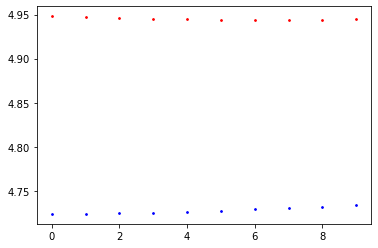

In [56]:
for i in perf.keys():
    plt.scatter(i, perf[i][0], color="blue", s=3)
    plt.scatter(i, perf[i][1], color="red", s=3)
    
plt.show()

In [58]:
testing_condition = ["13 features", ] # "26 features(+ squared)", "39 features","104 features (all pairs)"
testing_feature = [13, ]
lam = 6

i = 0
print("Testing Condition: ", testing_condition[i])
n = testing_feature[i]
partial_X_train = X_train.iloc[:,0:n].values
partial_X_test = X_test.iloc[:,0:n].values

alpha, beta_arr, _ = multivariate_ols(partial_X_train, y_train, lam=lam, R=0.01, MaxIterations=1000000, printing=False)
y_test_pred = alpha + partial_X_test.dot(beta_arr)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("****** test RMSE: %5.3f *****" % rmse)

Testing Condition:  13 features
****** test RMSE: 4.904 ***** 



What value of lambda minimizes your cross-validated (test) RMSE? Fix that value of lambda, and train a new model using 
all of your training data with that value of lambda (i.e., use the entire 80% of the data that you set aside in 4.1). Calcuate the RMSE for this model on the 20% of "true" test data. How does your test RMSE compare to the RMSE from 4.3, 4.2, 2.3, and to the RMSE from nearest neighbors? What do you make of these results?

*Observations*

- lambda=6 minimizes the RSME.
- The test RSME with penalty=6 results in RSME=4.9, which is higher compare to RMSE from 4.3/4.2, but lower than RMSE from 2.3 and KNN.
- Without a propoer regulation, OLS in 2.3/2.3 is overfitting the training data. Though it gives smaller RSME in testing dataset, it's still possible to fail to generalize in new datasets.

###  Extra Credit 2: AdaGrad

AdaGrad is a method to implement gradient descent with different learning rates for each feature. Adaptive algorithms like this one are being extensively used especially in neural network training. Implement AdaGrad on 2.3 but now use CRIM, RM and DIS as independent variables. Standardize these variables before inputting them to the gradient descent algorithm. Tune the algorithm until you estimate the regression coefficients within a tolerance of 1e-1. Use mini-batch gradient descent in this implementation. In summary for each parameter (in our case one intercept and three slopes) the update step of the gradient (in this example $\beta_j$) at iteration $k$ of the GD algorithm becomes:

$$\beta_j=\beta_j -\frac{R}{\sqrt{G^{(k)}_j}}\frac{\partial J(\alpha,\beta_1,\ldots)}{\partial \beta_j}$$ where
$G^{(k)}_j=\sum_{i=1}^{k} (\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j})^2$ and $R$ is your learning rate. The notation $\frac{\partial J^{(i)}(\alpha,\beta_1,\ldots)}{\partial \beta_j}$ corresponds to the value of the gradient at iteration $(i)$. Essentially we are "storing" information about previous iteration gradients. Doing that we effectively decrease the learning rate slower when a feature $x_i$ is sparse (i.e. has many zero values which would lead to zero gradients). Although this method is not necessary for our regression problem, it is good to be familiar with these methods as they are widely used in neural network training.  

In [ ]:
# Your code here

*Discuss your results here*